In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
#importing citipy
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

613

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2f884d00f0f4cdc032d2eb84286f1ef0"

In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chuy
Processing Record 2 of Set 1 | peniche
Processing Record 3 of Set 1 | san juan
Processing Record 4 of Set 1 | botwood
Processing Record 5 of Set 1 | cabo san lucas
Processing Record 6 of Set 1 | souillac
Processing Record 7 of Set 1 | cape town
Processing Record 8 of Set 1 | butaritari
Processing Record 9 of Set 1 | bushehr
Processing Record 10 of Set 1 | provideniya
Processing Record 11 of Set 1 | surt
Processing Record 12 of Set 1 | rikitea
Processing Record 13 of Set 1 | rocha
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | te anau
Processing Record 16 of Set 1 | north bend
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | esperance
Processing Record 19 of Set 1 | sampit
Processing Record 20 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 21 of Set 1 | kushmurun
Processing Record 22 of Set 1 | saint george
Processing Rec

Processing Record 42 of Set 4 | pevek
Processing Record 43 of Set 4 | louisbourg
City not found. Skipping...
Processing Record 44 of Set 4 | haines junction
Processing Record 45 of Set 4 | ulladulla
Processing Record 46 of Set 4 | hambantota
Processing Record 47 of Set 4 | gold coast
Processing Record 48 of Set 4 | tilichiki
Processing Record 49 of Set 4 | kudat
Processing Record 50 of Set 4 | kavaratti
Processing Record 1 of Set 5 | sala
Processing Record 2 of Set 5 | afsin
Processing Record 3 of Set 5 | port elizabeth
Processing Record 4 of Set 5 | cidreira
Processing Record 5 of Set 5 | general roca
Processing Record 6 of Set 5 | belushya guba
City not found. Skipping...
Processing Record 7 of Set 5 | inzer
Processing Record 8 of Set 5 | nabire
Processing Record 9 of Set 5 | carthage
Processing Record 10 of Set 5 | malinovoye ozero
Processing Record 11 of Set 5 | nizhniy kuranakh
Processing Record 12 of Set 5 | kadugannawa
Processing Record 13 of Set 5 | kaitangata
Processing Record

Processing Record 32 of Set 8 | chapais
Processing Record 33 of Set 8 | cajamar
Processing Record 34 of Set 8 | piopio
Processing Record 35 of Set 8 | leshukonskoye
Processing Record 36 of Set 8 | pafos
Processing Record 37 of Set 8 | puerto madryn
Processing Record 38 of Set 8 | nouadhibou
Processing Record 39 of Set 8 | zhenlai
Processing Record 40 of Set 8 | ponnani
Processing Record 41 of Set 8 | ballina
Processing Record 42 of Set 8 | baicheng
Processing Record 43 of Set 8 | konevo
Processing Record 44 of Set 8 | kargil
Processing Record 45 of Set 8 | tura
Processing Record 46 of Set 8 | dolbeau
City not found. Skipping...
Processing Record 47 of Set 8 | arman
Processing Record 48 of Set 8 | vawkavysk
Processing Record 49 of Set 8 | pangai
Processing Record 50 of Set 8 | nanortalik
Processing Record 1 of Set 9 | kangaatsiaq
Processing Record 2 of Set 9 | xining
Processing Record 3 of Set 9 | san patricio
Processing Record 4 of Set 9 | vanimo
Processing Record 5 of Set 9 | seymchan

Processing Record 25 of Set 12 | tautira
Processing Record 26 of Set 12 | tonj
Processing Record 27 of Set 12 | palabuhanratu
City not found. Skipping...
Processing Record 28 of Set 12 | naldurg
Processing Record 29 of Set 12 | oistins
Processing Record 30 of Set 12 | karaul
City not found. Skipping...
Processing Record 31 of Set 12 | shamkhal
Processing Record 32 of Set 12 | pangnirtung
Processing Record 33 of Set 12 | chumikan
Processing Record 34 of Set 12 | doka
Processing Record 35 of Set 12 | madona
Processing Record 36 of Set 12 | victor harbor
Processing Record 37 of Set 12 | lukaya
Processing Record 38 of Set 12 | maningrida
Processing Record 39 of Set 12 | kahului
Processing Record 40 of Set 12 | opuwo
Processing Record 41 of Set 12 | marsa matruh
Processing Record 42 of Set 12 | hwange
Processing Record 43 of Set 12 | ekhabi
Processing Record 44 of Set 12 | inhambane
Processing Record 45 of Set 12 | unisan
Processing Record 46 of Set 12 | bandarbeyla
Processing Record 47 of 

In [10]:
len(city_data)

577

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Chuy,-33.70,-53.46,50.88,74,100,8.63,UY,2020-07-08 02:44:09
1,Peniche,39.36,-9.38,64.99,85,88,5.01,PT,2020-07-08 02:44:09
2,San Juan,-31.54,-68.54,41.95,65,0,3.36,AR,2020-07-08 02:44:10
3,Botwood,49.15,-55.35,60.80,77,20,10.29,CA,2020-07-08 02:44:10
4,Cabo San Lucas,22.89,-109.91,91.40,45,5,11.41,MX,2020-07-08 02:41:56
5,Souillac,-20.52,57.52,71.60,83,75,8.05,MU,2020-07-08 02:44:10
6,Cape Town,-33.93,18.42,43.00,93,12,5.82,ZA,2020-07-08 02:39:27
7,Butaritari,3.07,172.79,83.59,72,4,11.77,KI,2020-07-08 02:44:10
8,Bushehr,28.97,50.84,86.00,84,0,6.93,IR,2020-07-08 02:44:10
9,Provideniya,64.38,-173.30,44.60,93,90,8.95,RU,2020-07-08 02:44:10


In [12]:
# Changing the order of the columns
newColumnOrder = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']
city_data_df = city_data_df[newColumnOrder]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Chuy,UY,2020-07-08 02:44:09,-33.70,-53.46,50.88,74,100,8.63
1,Peniche,PT,2020-07-08 02:44:09,39.36,-9.38,64.99,85,88,5.01
2,San Juan,AR,2020-07-08 02:44:10,-31.54,-68.54,41.95,65,0,3.36
3,Botwood,CA,2020-07-08 02:44:10,49.15,-55.35,60.80,77,20,10.29
4,Cabo San Lucas,MX,2020-07-08 02:41:56,22.89,-109.91,91.40,45,5,11.41
...,...,...,...,...,...,...,...,...,...
572,Samarai,PG,2020-07-08 02:45:34,-10.62,150.67,78.93,84,82,16.69
573,Grindavik,IS,2020-07-08 02:45:35,63.84,-22.43,46.40,81,75,9.17
574,Cabedelo,BR,2020-07-08 02:45:35,-6.98,-34.83,74.61,83,15,4.34
575,San Policarpo,PH,2020-07-08 02:45:35,12.18,125.51,85.53,71,97,7.09


In [13]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [14]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

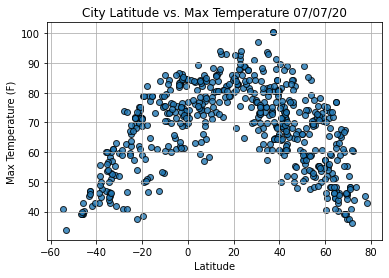

In [16]:
import time
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

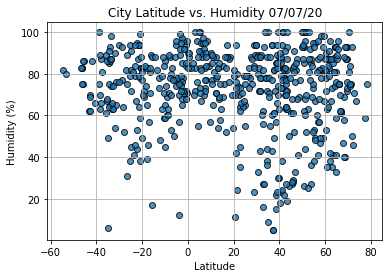

In [17]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

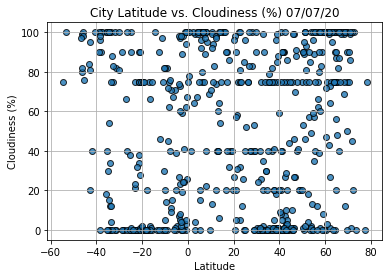

In [18]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

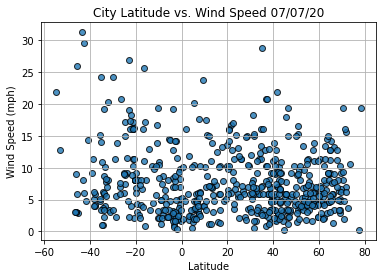

In [19]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()